In [41]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates




# AAPL

#### Reading the data

In [42]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\AAPL_historical_data.csv')

# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Display the first few rows of the data
print(df.head())

         Date      Open      High       Low     Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600


#### Analysis Indicators

                 Open       High        Low      Close     Volume      SMA20  \
Date                                                                           
2020-01-02  74.059998  75.150002  73.797501  75.087502  135480400  69.797249   
2020-01-03  74.287498  75.144997  74.125000  74.357498  146322800  70.243374   
2020-01-06  73.447502  74.989998  73.187500  74.949997  118387200  70.671124   
2020-01-07  74.959999  75.224998  74.370003  74.597504  108872000  71.017124   
2020-01-08  74.290001  76.110001  74.290001  75.797501  132079200  71.470499   

                  EMA        RSI      MACD  MACD_Signal  MACD_Hist    Return  \
Date                                                                           
2020-01-02  70.360946  84.583737  2.177467     1.831564   0.345902  0.022816   
2020-01-03  70.741570  77.703695  2.228504     1.910952   0.317552 -0.009722   
2020-01-06  71.142373  79.183674  2.290359     1.986833   0.303526  0.007968   
2020-01-07  71.471433  75.953553  2.284

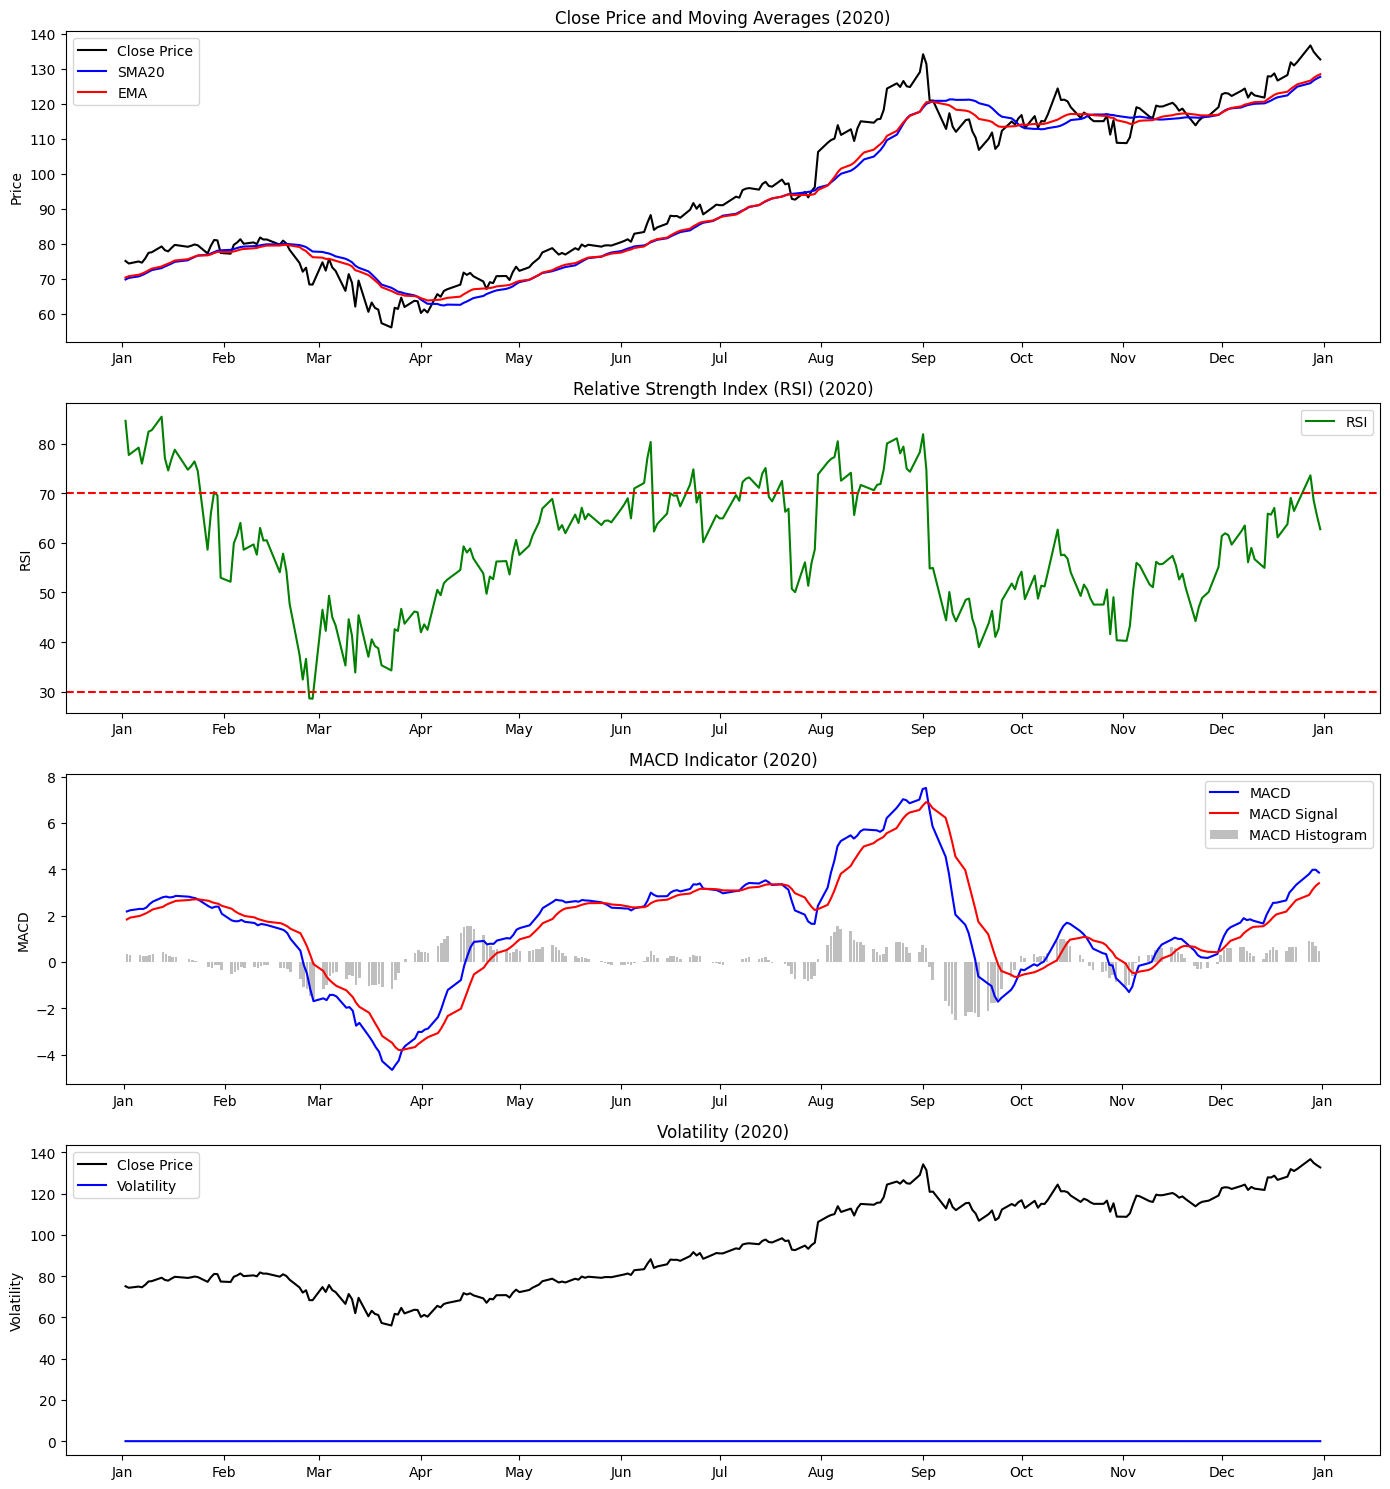

In [43]:
# Convert Date column to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])  # Corrected: Ensure 'Date' column is in datetime format
df.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA'] = talib.EMA(df['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
df_2020 = df.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(df_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['SMA20'], label='SMA20', color='blue')
plt.plot(df_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(df_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(df_2020['MACD'], label='MACD', color='blue')
plt.plot(df_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df_2020.index, df_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()
